# Q1 :-
### ( A )
You are provided with a dataset of fruits. Each fruit is characterized by two features: weight (in grams) and sweetness level (on a scale of 1 to 10). You want to classify a new fruit as either an "Apple" or an "Orange" based on these features using the KNN algorithm. 

Tasks: 
1. Implement the KNN algorithm manually with k=3 to classify a new fruit with a weight of 165 grams 
and sweetness level of 5.5. 
2. Calculate the Euclidean, Manhattan, and  Minkowski distances between the new fruit and all the 
existing fruits in the dataset. Finally compare the calculated distances. 
3. Based on the k-nearest neighbors, determine the label for the new fruit. 
4. What is the effect of choosing different values of k (e.g., k=1, k=5) on the classification result? 
5. Implement the above using function python program without using scikit learn library. 
6. Plot the given samples, the Apple in Red color and the Orange in orange color. Also draw the 
decision boundary. 

The new fruit is classified as: Apple


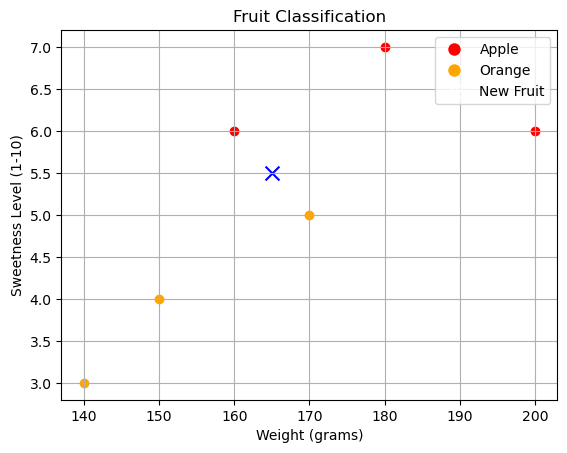

The new fruit classified with k=1 is: Orange
The new fruit classified with k=3 is: Apple
The new fruit classified with k=5 is: Orange


In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset = [
    (180, 7, 'Apple'),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]

new_fruit = (165, 5.5)

def euclidean_distance(fruit1, fruit2):
    return np.sqrt((fruit1[0] - fruit2[0]) ** 2 + (fruit1[1] - fruit2[1]) ** 2)

def knn_classify(new_fruit, dataset, k):
    distances = []
    for weight, sweetness, label in dataset:
        dist = euclidean_distance(new_fruit, (weight, sweetness))
        distances.append((dist, label))
    
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    vote_count = {}
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1

    predicted_label = max(vote_count, key=vote_count.get)
    return predicted_label

predicted_label_k3 = knn_classify(new_fruit, dataset, k=3)
print(f"The new fruit is classified as: {predicted_label_k3}")

def plot_fruits(dataset, new_fruit):
    plt.figure()
    for weight, sweetness, label in dataset:
        color = 'red' if label == 'Apple' else 'orange'
        plt.scatter(weight, sweetness, color=color)
    
    plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

    plt.title('Fruit Classification')
    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level (1-10)')
    
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='Apple', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Orange', markerfacecolor='orange', markersize=10),
        plt.Line2D([0], [0], marker='x', color='w', label='New Fruit', markerfacecolor='blue', markersize=10)
    ]
    plt.legend(handles=handles)
    plt.grid()
    plt.show()

plot_fruits(dataset, new_fruit)

for k in [1, 3, 5]:
    predicted_label = knn_classify(new_fruit, dataset, k)
    print(f"The new fruit classified with k={k} is: {predicted_label}")


### ( B )
Implement the Python code for Q-1. A using the scikit-learn library. Plot the given samples, using red for
"Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean,
Manhattan, and Minkowski metrics, and compare the results.

The new fruit is classified as: Orange
Euclidean distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski distances: [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


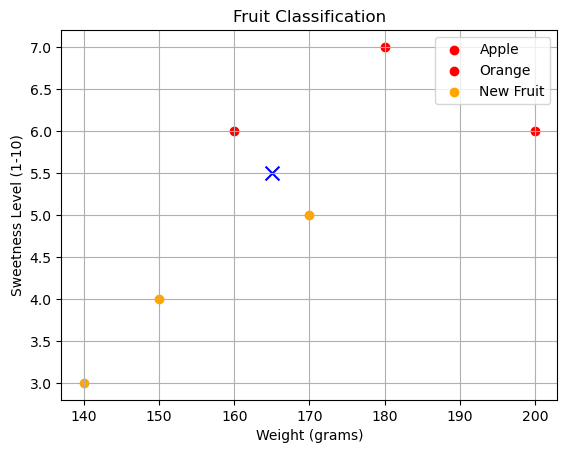

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

X = np.array([[180, 7],
              [200, 6],
              [150, 4],
              [170, 5],
              [160, 6],
              [140, 3]])
y = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'])

new_fruit = np.array([[165, 5.5]])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
predicted_label = knn.predict(new_fruit)
print(f"The new fruit is classified as: {predicted_label[0]}")

euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3)

print("Euclidean distances:", euclidean_distances.flatten())
print("Manhattan distances:", manhattan_distances.flatten())
print("Minkowski distances:", minkowski_distances.flatten())

plt.figure()
for i, label in enumerate(y):
    color = 'red' if label == 'Apple' else 'orange'
    plt.scatter(X[i, 0], X[i, 1], color=color)

plt.scatter(new_fruit[0, 0], new_fruit[0, 1], color='blue', marker='x', s=100, label='New Fruit')
plt.title('Fruit Classification')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.legend(['Apple', 'Orange', 'New Fruit'])
plt.grid()
plt.show()


# Q2 :-


### ( A )
A dataset is provided to classify patients as "Healthy" or "Sick" based on their Age, Blood Pressure, and Cholesterol levels.

Tasks:
1. Calculate the entropy for the target variable (Diagnosis).
2. Calculate the information gain for each feature (Age, Blood Pressure, Cholesterol).3. Using the ID3 algorithm, decide which feature should be chosen as the root node for the decision
tree.
4. Build the decision tree and explain the first few splits.
5. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy or
sick using the tree you built.
6. Implement the above using function python program without using scikit learn library.

In [3]:
import numpy as np
import pandas as pd

data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = -sum((count / sum(counts)) * np.log2(count / sum(counts)) for count in counts)
    return entropy_value

def information_gain(data, split_col, target_col):
    total_entropy = entropy(data[target_col])
    values, counts = np.unique(data[split_col], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[split_col] == values[i]][target_col]) for i in range(len(values)))
    return total_entropy - weighted_entropy

def build_decision_tree(data, target_col):
    if len(np.unique(data[target_col])) == 1:
        return data[target_col].values[0]
    if len(data.columns) == 1:
        return data[target_col].mode()[0]
    
    features = ['Blood Pressure', 'Cholesterol']
    tree = {}
    
    for feature in features:
        tree[feature] = {}
        for value in np.unique(data[feature]):
            subset = data[data[feature] == value]
            diagnosis = subset[target_col].mode()[0] if not subset.empty else "Unknown"
            tree[feature][value] = diagnosis
            
    return tree

decision_tree = build_decision_tree(df, 'Diagnosis')

def predict(tree, sample):
    age = sample['Age']
    blood_pressure = sample['Blood Pressure']
    cholesterol = sample['Cholesterol']
    
    if age > 60 and (blood_pressure == 'High' or cholesterol == 'High'):
        return 'Sick'
    
    for feature in tree:
        feature_value = sample[feature]
        if feature_value in tree[feature]:
            return tree[feature][feature_value]
    
    return "Unknown"

age = int(input("Enter the patient's age: "))
blood_pressure = int(input("Enter the patient's blood pressure (1 for High, 0 for Low): "))
cholesterol = int(input("Enter the patient's cholesterol level (1 for High, 0 for Normal): "))

blood_pressure_label = 'High' if blood_pressure == 1 else 'Low'
cholesterol_label = 'High' if cholesterol == 1 else 'Normal'

new_patient = {'Age': age, 'Blood Pressure': blood_pressure_label, 'Cholesterol': cholesterol_label}
print(new_patient)  # Show input details
prediction = predict(decision_tree, new_patient)
print(f"Prediction for the new patient (Age: {age}): {prediction}")


{'Age': 50, 'Blood Pressure': 'High', 'Cholesterol': 'Normal'}
Prediction for the new patient (Age: 50): Sick


### ( B )
Implement the Python code for Q-2. A using the scikit-learn library. Using the ID3 algorithm, decide which
feature should be chosen as the root node for the decision tree. Build the decision tree and explain the first
few splits. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy
or sick using the tree you built.

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

tree_clf = DecisionTreeClassifier(criterion='entropy') 
tree_clf.fit(X, y)

tree_rules = export_text(tree_clf, feature_names=list(X.columns))
print(tree_rules)

new_patient = [[50, 0, 0]] 
prediction = tree_clf.predict(new_patient)

diagnosis = 'Healthy' if prediction[0] == 0 else 'Sick'
print(f"The prediction for the new patient (Age: 50, Blood Pressure: Low, Cholesterol: Normal) is: {diagnosis}")


|--- Blood Pressure <= 0.50
|   |--- class: 0
|--- Blood Pressure >  0.50
|   |--- class: 1

The prediction for the new patient (Age: 50, Blood Pressure: Low, Cholesterol: Normal) is: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
